In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_profile = pd.read_csv('df_profile_all.csv')

In [3]:
df = df_profile[['ID','Country','DEFIANCE','DISBELIEF', 'RELATIVISM','SCEPTICISM','AUTONOMY','EQUALITY','CHOICE','VOICE','SACSECVAL','RESEMAVAL','Values Groups']]

In [4]:
df.head()

,ID,Country,DEFIANCE,DISBELIEF,RELATIVISM,SCEPTICISM,AUTONOMY,EQUALITY,CHOICE,VOICE,SACSECVAL,RESEMAVAL,Values Groups
0,0,Algeria,0.000000,0.111111,0.333333,0.440000,0.333333,0.000000,0.074074,0.250,0.221111,0.164352,1
1,1,Algeria,0.386667,0.165556,0.333333,0.220000,0.000000,0.110000,0.000000,0.330,0.276389,0.110000,1
2,2,Algeria,0.166667,0.055556,0.333333,0.663333,0.333333,0.000000,0.111111,0.165,0.304722,0.152361,1
3,3,Algeria,0.000000,0.055556,0.333333,0.663333,0.000000,0.386667,0.000000,0.000,0.263056,0.096667,1
4,4,Algeria,0.000000,0.000000,0.333333,0.550000,0.333333,0.220000,0.074074,0.330,0.220833,0.239352,1


In [5]:
df['Count'] = df.groupby(['Country'])['ID'].transform('count')

C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
df_new = df.groupby(['Country']).count()

In [7]:
df_new.reset_index(inplace=True)

In [8]:
df_new = df_new[['Country','Count']]

In [9]:
Num_clusters_by_country = df.groupby(['Country','Values Groups']).count()

In [10]:
Num_clusters_by_country.reset_index(inplace=True)

In [11]:
Num_clusters_by_country.head(10)

,Country,Values Groups,ID,DEFIANCE,DISBELIEF,RELATIVISM,SCEPTICISM,AUTONOMY,EQUALITY,CHOICE,VOICE,SACSECVAL,RESEMAVAL,Count
0,Algeria,1,335,335,335,335,335,335,335,335,335,335,335,335
1,Algeria,2,45,45,45,45,45,45,45,45,45,45,45,45
2,Algeria,3,497,497,497,497,497,497,497,497,497,497,497,497
3,Algeria,4,264,264,264,264,264,264,264,264,264,264,264,264
4,Argentina,1,52,52,52,52,52,52,52,52,52,52,52,52
5,Argentina,2,400,400,400,400,400,400,400,400,400,400,400,400
6,Argentina,3,171,171,171,171,171,171,171,171,171,171,171,171
7,Argentina,4,396,396,396,396,396,396,396,396,396,396,396,396
8,Armenia,1,522,522,522,522,522,522,522,522,522,522,522,522
9,Armenia,2,28,28,28,28,28,28,28,28,28,28,28,28


In [12]:
Percent_df = pd.merge(Num_clusters_by_country[['Country','Values Groups', 'Count']], df_new, on='Country')

In [13]:
Percent_df.head()

,Country,Values Groups,Count_x,Count_y
0,Algeria,1,335,1141
1,Algeria,2,45,1141
2,Algeria,3,497,1141
3,Algeria,4,264,1141
4,Argentina,1,52,1019


In [14]:
Percent_df['Prop'] = Percent_df['Count_x']/Percent_df['Count_y']

In [15]:
Percent_df = Percent_df[['Country','Values Groups','Prop']]

In [16]:
Percent_df.head()

,Country,Values Groups,Prop
0,Algeria,1,0.293602
1,Algeria,2,0.039439
2,Algeria,3,0.435583
3,Algeria,4,0.231376
4,Argentina,1,0.051030


In [17]:
df_prop = Percent_df.pivot(index= Percent_df['Country'], columns = 'Values Groups')['Prop']

In [18]:
df_prop = pd.DataFrame(df_prop.to_records())
df_prop.head()

,Country,1,2,3,4
0,Algeria,0.293602,0.039439,0.435583,0.231376
1,Argentina,0.051030,0.392542,0.167812,0.388616
2,Armenia,0.475410,0.025501,0.166667,0.332423
3,Australia,0.125000,0.670082,0.073087,0.131831
4,Azerbaijan,0.594378,0.148594,0.088353,0.168675


In [19]:
df_prop = df_prop.rename(columns = {'1':'Group 1', '2':'Group 2', '3':'Group 3', '4':'Group 4'})
df_prop.set_index('Country', inplace = True)
df_prop.head()

,Group 1,Group 2,Group 3,Group 4
Country,,,,
Algeria,0.293602,0.039439,0.435583,0.231376
Argentina,0.051030,0.392542,0.167812,0.388616
Armenia,0.475410,0.025501,0.166667,0.332423
Australia,0.125000,0.670082,0.073087,0.131831
Azerbaijan,0.594378,0.148594,0.088353,0.168675


In [20]:
df_prop.isnull().sum()

Group 1    0
Group 2    1
Group 3    0
Group 4    0
dtype: int64

In [21]:
df_prop.shape

(60, 4)

In [22]:
df_prop['Group 2'] = df_prop['Group 2'].fillna(df_prop['Group 2'].mean())

In [23]:
df_prop.isnull().sum()

Group 1    0
Group 2    0
Group 3    0
Group 4    0
dtype: int64

In [24]:
df_prop.head()

,Group 1,Group 2,Group 3,Group 4
Country,,,,
Algeria,0.293602,0.039439,0.435583,0.231376
Argentina,0.051030,0.392542,0.167812,0.388616
Armenia,0.475410,0.025501,0.166667,0.332423
Australia,0.125000,0.670082,0.073087,0.131831
Azerbaijan,0.594378,0.148594,0.088353,0.168675


In [25]:
scaler = StandardScaler()
df_prop_std = scaler.fit_transform(df_prop)

In [26]:
pca = PCA()
pca.fit(df_prop_std)
PCA (copy = True, iterated_power = 'auto', n_components = None, random_state = None, svd_solver = 'auto',\
    tol=0.0, whiten = False)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca.explained_variance_ratio_

array([0.45479358, 0.33685606, 0.20708261, 0.00126774])

Text(0, 0.5, 'Cumulative Explained Variance')

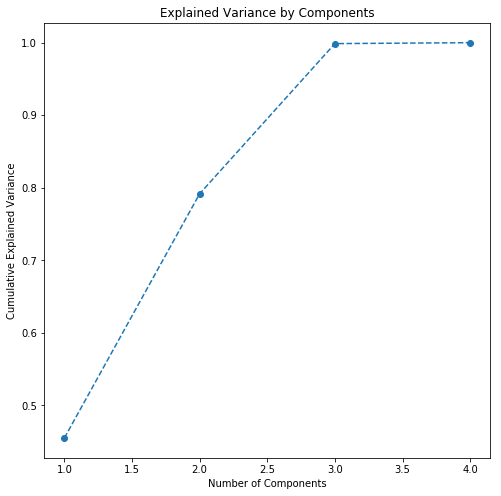

In [28]:
plt.figure(figsize = (8,8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [29]:
pca = PCA(n_components = 3)
pca.fit(df_prop_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pca.components_

array([[-0.32091974,  0.72970591, -0.51250911, -0.31917741],
       [ 0.75172714, -0.10555463, -0.24553481, -0.60289069],
       [ 0.24530705, -0.13047951, -0.72898814,  0.62560038]])

In [31]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns = df_prop.columns.values,
                          index = ['Component 1','Component 2','Component 3'])
df_pca_comp

,Group 1,Group 2,Group 3,Group 4
Component 1,-0.320920,0.729706,-0.512509,-0.319177
Component 2,0.751727,-0.105555,-0.245535,-0.602891
Component 3,0.245307,-0.130480,-0.728988,0.625600


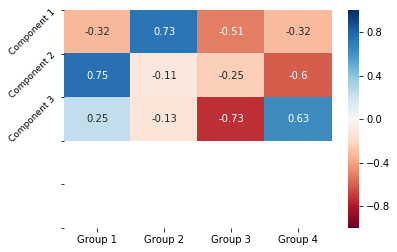

In [32]:
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap = 'RdBu',
           annot = True)
plt.yticks([0,1,2,3,4,5],
           ['Component 1','Component 2','Component 3'],
           rotation = 45, fontsize = 9);

In [33]:
scores_pca = pca.transform(df_prop_std)

In [34]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

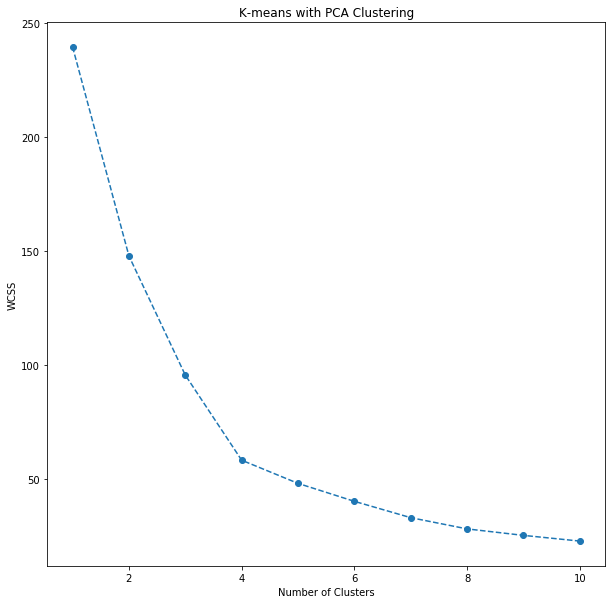

In [35]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,10))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [36]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(df_prop_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [37]:
df_prop['Country'] = df_prop.index

In [38]:
df_val_pca_kmeans = pd.concat([df_prop.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_val_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_val_pca_kmeans['Clusters'] = kmeans_pca.labels_

In [39]:
df_val_pca_kmeans['Clusters'] = df_val_pca_kmeans['Clusters'].map({0:'1', 
                                                          1:'2',
                                                          2:'3', 
                                                          3:'4'})
df_val_pca_kmeans.head()

,Group 1,Group 2,Group 3,Group 4,Country,Component 1,Component 2,Component 3,Clusters
0,0.293602,0.039439,0.435583,0.231376,Algeria,-1.218164,-0.214611,-0.912588,3
1,0.051030,0.392542,0.167812,0.388616,Argentina,0.738500,-1.414067,0.643097,1
2,0.475410,0.025501,0.166667,0.332423,Armenia,-0.806650,0.470949,1.082729,4
3,0.125000,0.670082,0.073087,0.131831,Australia,2.300181,-0.045869,-0.036145,2
4,0.594378,0.148594,0.088353,0.168675,Azerbaijan,-0.007599,1.649643,0.849201,4


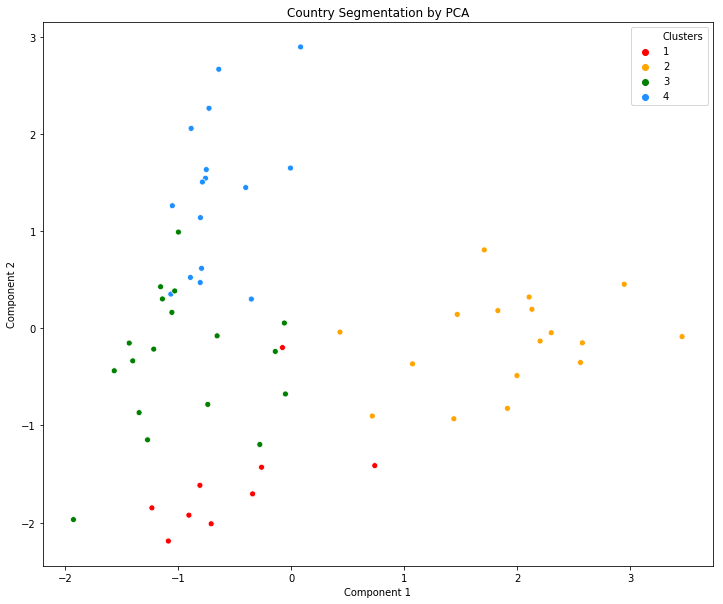

In [40]:
x_axis = df_val_pca_kmeans['Component 1']
y_axis = df_val_pca_kmeans['Component 2']
plt.figure(figsize = (12, 10))
sns.scatterplot(x_axis, y_axis, hue = df_val_pca_kmeans['Clusters'], palette = ['red','orange','green','dodgerblue'])
plt.title('Country Segmentation by PCA')
plt.show()

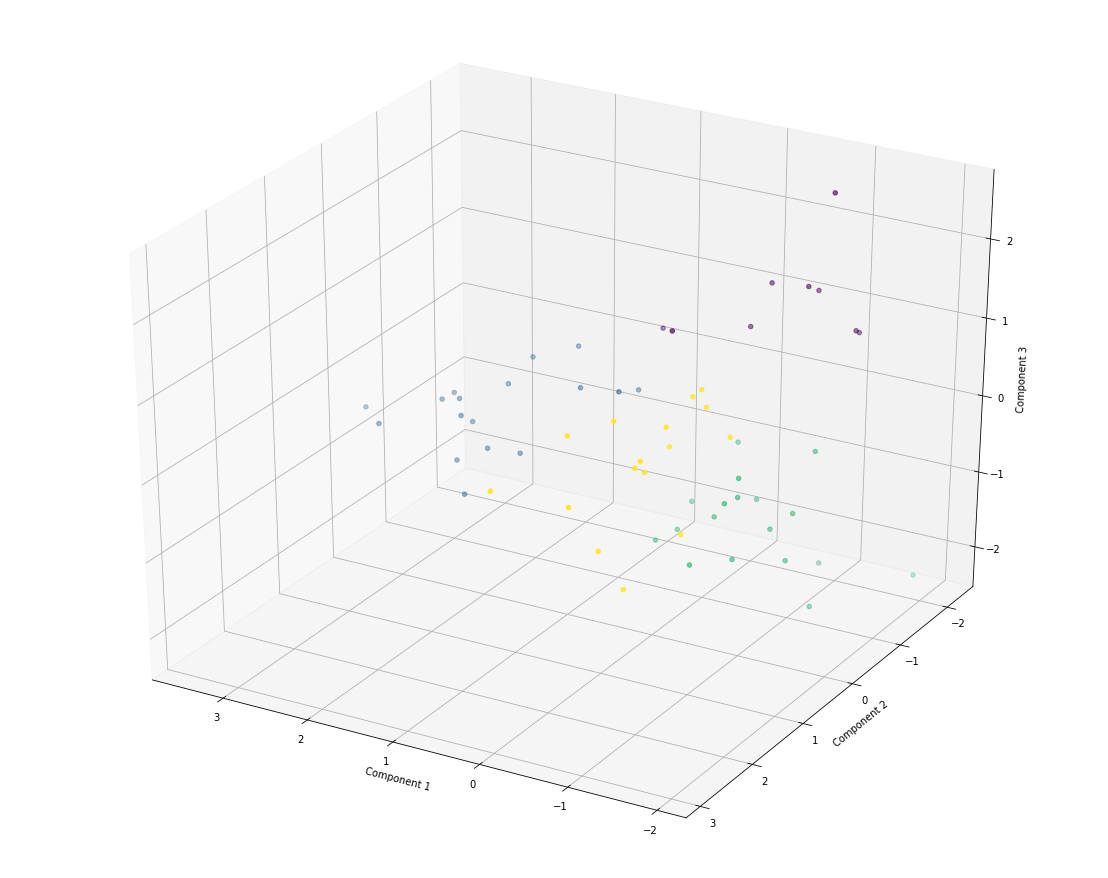

In [41]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 12))
plt.clf()
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 30, azim =120)
# ax = fig.add_subplot(111, projection = '3d')

plt.cla()

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

X = df_val_pca_kmeans['Component 1']
Y = df_val_pca_kmeans['Component 2']
Z = df_val_pca_kmeans['Component 3']

ax.scatter(X,Y,Z, c= df_val_pca_kmeans['Clusters'].astype(int))

In [42]:
df_val_pca_kmeans.to_csv('Country_Cluster.csv', sep = ',')

In [43]:
df_val_pca_kmeans.head()

,Group 1,Group 2,Group 3,Group 4,Country,Component 1,Component 2,Component 3,Clusters
0,0.293602,0.039439,0.435583,0.231376,Algeria,-1.218164,-0.214611,-0.912588,3
1,0.051030,0.392542,0.167812,0.388616,Argentina,0.738500,-1.414067,0.643097,1
2,0.475410,0.025501,0.166667,0.332423,Armenia,-0.806650,0.470949,1.082729,4
3,0.125000,0.670082,0.073087,0.131831,Australia,2.300181,-0.045869,-0.036145,2
4,0.594378,0.148594,0.088353,0.168675,Azerbaijan,-0.007599,1.649643,0.849201,4


## Ratio Analysis - PCA with Kmeans

In [46]:
df_kmeans_analysis = df_val_pca_kmeans.groupby(['Clusters']).mean()
df_kmeans_analysis['N Obs'] = df_val_pca_kmeans[['Clusters','Group 1']].groupby(['Clusters']).count()
df_kmeans_analysis['Prop Obs'] = df_kmeans_analysis['N Obs']/ df_kmeans_analysis['N Obs'].sum()
df_kmeans_analysis.head()

,Group 1,Group 2,Group 3,Group 4,Component 1,Component 2,Component 3,N Obs,Prop Obs
Clusters,,,,,,,,,
1,0.138287,0.138802,0.206975,0.515937,-0.521727,-1.593450,1.220389,9,0.150000
2,0.131914,0.606375,0.113877,0.147834,1.932390,-0.130294,-0.131779,17,0.283333
3,0.257462,0.091239,0.426568,0.224731,-0.971873,-0.320967,-0.963678,18,0.300000
4,0.587547,0.049016,0.182215,0.195789,-0.666336,1.395841,0.537684,16,0.266667
